In [1]:
#gerekli olan kütüphanelerin kurulumu
import tensorflow.keras as keras #pip install tensorflow
from tensorflow.keras.datasets import cifar10 #veri kümesi

from sklearn.model_selection import train_test_split #veri kümesini böler
from tensorflow.keras.models import Sequential #yapay sinir ağı modeli

#giriş katmanından başlayarak sirali olarak birbirini takip eden katmanlar eklenir.
#bu işlem çıktı katmanına kadar devam eder.

from tensorflow.keras.layers import Conv2D #2 boyutlu veriler üzerinde evrişim(erişim?) işlemi gerçekleştilir
from tensorflow.keras.layers import MaxPooling2D #önemli özellikleri kormak için kullanilir.
from tensorflow.keras.layers import Flatten #tek boyutlu veriye dönüştürür
from tensorflow.keras.layers import Dense #full connected bağlantıları temsil edilir

#çıktı aktivisyon fonksiyonumuz. (sigmoid, softmax vb.)

import matplotlib.pyplot as plt
import numpy as np

In [2]:
# CIFAR-10 veri kümesini okuma
(x_train,y_train),(x_test,y_test) = cifar10.load_data() 

170498071/170498071 [==============================] - 143s 1us/step


In [3]:
len(x_train)

50000

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [6]:
len(y_train)

50000

In [8]:
y_train[5]

array([1], dtype=uint8)

In [9]:
len(x_test)

10000

In [11]:
len(y_test)

10000

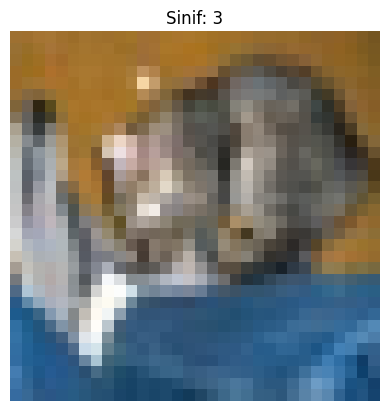

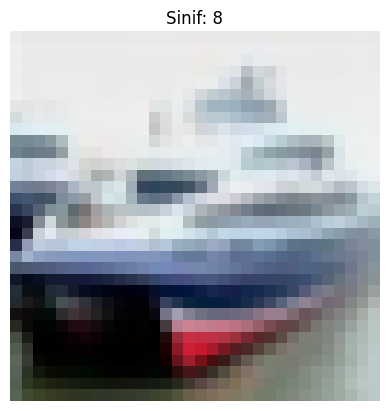

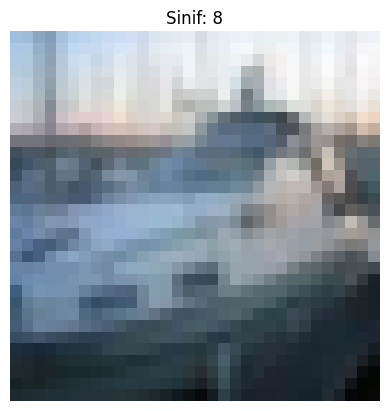

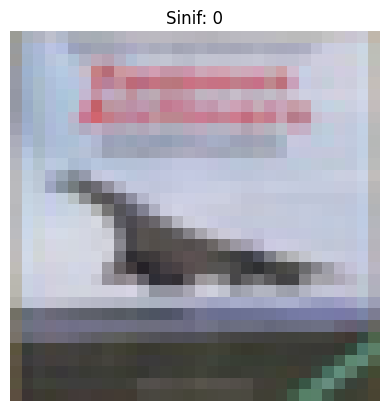

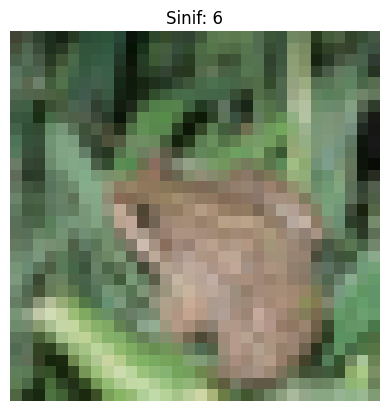

In [12]:
#veri setinden örnek resim gösterme

for i in range(5):
    plt.imshow(x_test[i])
    plt.title("Sinif: " + str(y_test[i][0]))
    plt.axis("off")
    plt.show()

In [13]:
#eğitim ve test verilerinin birleştirilmesi
x_data = np.concatenate((x_train,x_test),axis=0)
y_data = np.concatenate((y_train,y_test),axis=0)

In [14]:
len(x_data)

60000

In [15]:
len(y_data)

60000

In [16]:
x_data[100]

array([[[213, 229, 242],
        [211, 227, 240],
        [211, 227, 240],
        ...,
        [151, 174, 206],
        [151, 174, 206],
        [149, 172, 204]],

       [[214, 229, 241],
        [212, 227, 239],
        [212, 227, 239],
        ...,
        [152, 175, 207],
        [152, 175, 207],
        [151, 174, 205]],

       [[216, 229, 239],
        [214, 227, 237],
        [213, 227, 237],
        ...,
        [153, 176, 206],
        [153, 176, 206],
        [151, 174, 204]],

       ...,

       [[145, 159, 165],
        [136, 148, 154],
        [143, 152, 158],
        ...,
        [216, 217, 206],
        [196, 197, 191],
        [183, 183, 182]],

       [[139, 153, 159],
        [129, 142, 148],
        [129, 139, 145],
        ...,
        [227, 228, 219],
        [223, 224, 219],
        [209, 209, 209]],

       [[137, 152, 157],
        [143, 155, 161],
        [136, 145, 152],
        ...,
        [209, 209, 203],
        [217, 217, 213],
        [228, 228, 226]]

In [17]:
y_data[100] #8 numarali etiketli image'mizi temsil ediyo

array([8], dtype=uint8)

In [18]:
# eğitim ve test verisi olarak bölme
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data,test_size=0.2,random_state=42)

In [19]:
len(x_train)

48000

In [20]:
len(y_train)

48000

In [21]:
len(x_test)

12000

In [22]:
len(y_test)

12000

In [23]:
x_train[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [253, 253, 253],
        [250, 250, 250],
        ...,
        [249, 249, 249],
        [253, 253, 254],
        [255, 255, 255]],

       [[255, 255, 255],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [252, 252, 252],
        [254, 254, 254],
        [255, 255, 255]],

       [[255, 255, 255],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [24]:
y_train[0]

array([3], dtype=uint8)

In [25]:
600000*0.8

480000.0

In [26]:
#verileri 0-1 arasinda normalize edilmesi
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype("float32")/255.0

In [27]:
x_train[100]

array([[[0.3254902 , 0.34509805, 0.4       ],
        [0.3254902 , 0.34117648, 0.39607844],
        [0.34509805, 0.3647059 , 0.41960785],
        ...,
        [0.6431373 , 0.6392157 , 0.61960787],
        [0.6313726 , 0.627451  , 0.60784316],
        [0.61960787, 0.61960787, 0.6       ]],

       [[0.38039216, 0.38039216, 0.4117647 ],
        [0.4       , 0.4       , 0.43137255],
        [0.40392157, 0.40392157, 0.4392157 ],
        ...,
        [0.67058825, 0.654902  , 0.6313726 ],
        [0.65882355, 0.6431373 , 0.61960787],
        [0.6509804 , 0.63529414, 0.6117647 ]],

       [[0.43137255, 0.41568628, 0.42745098],
        [0.44705883, 0.43137255, 0.44313726],
        [0.45490196, 0.4392157 , 0.45490196],
        ...,
        [0.7019608 , 0.6666667 , 0.63529414],
        [0.6862745 , 0.6509804 , 0.62352943],
        [0.6784314 , 0.64705884, 0.6156863 ]],

       ...,

       [[0.05490196, 0.01568628, 0.01960784],
        [0.05098039, 0.00784314, 0.00392157],
        [0.06666667, 0

In [28]:
#one hot encoding yöntemi
num_classes = 10
y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)

In [29]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [30]:
x_train.shape[1:]

(32, 32, 3)

In [31]:
x_train[0].shape

(32, 32, 3)

In [35]:
## CNN MODEL

model = Sequential()

model.add(Conv2D(32,(3,3),activation="relu",padding="same",input_shape=x_train.shape[1:])) #3x3lük filtre uygular
#relu: negatif degerleri sifir yapar ve pozitif kisimlari korur
#padding: çikiş boyutunun giriş boyutuna benzerliğini sağlar

#giriş kanal sayisi: 3
#çıkış kanal sayisi: 32
#her bir filtre için toplam parametre sayisi: 3*3*3 +1(bias) = 28
#genel toplam parametre: 28*32 = 896

model.add(Conv2D(32,(3,3),activation="relu"))

#filtre= 3*3
#giriş kanal sayisi: 32
#çıkış kanal sayisi: 32
#her bir filtre için toplam parametre sayisi: (3*3*32) +1(bias) = 289
#genel toplam parametre: 289*32 = 9248

model.add(MaxPooling2D(pool_size=(2,2))) #belirli bir bölgedeki en büyük değeri alir

model.add(Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(Conv2D(64,(3,3),activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())#modelimizi tek boyutlu hale getiriyoruz

model.add(Dense(512,activation="relu"))
model.add(Dense(num_classes,activation="softmax")) #softmax ile elemanlari olasilik değerlerini döndürür.

In [36]:
#modelin derlenmesi
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [37]:
model.summary() #genel özelliklerine bakabiliyoruz böylece modelimizin

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                  

In [38]:
6*6*64

2304

In [39]:
len(x_train)/128

375.0

In [40]:
#modeli eğitme
batch_size = 128
epochs = 10
model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test,y_test))

Epoch 1/10
375/375 [==============================] - 222s 585ms/step - loss: 1.4720 - accuracy: 0.4691 - val_loss: 1.1906 - val_accuracy: 0.5693
Epoch 2/10
375/375 [==============================] - 241s 645ms/step - loss: 1.0542 - accuracy: 0.6303 - val_loss: 0.9767 - val_accuracy: 0.6538
Epoch 3/10
375/375 [==============================] - 244s 651ms/step - loss: 0.8608 - accuracy: 0.6971 - val_loss: 0.8660 - val_accuracy: 0.6984
Epoch 4/10
375/375 [==============================] - 234s 623ms/step - loss: 0.7146 - accuracy: 0.7506 - val_loss: 0.7942 - val_accuracy: 0.7267
Epoch 5/10
375/375 [==============================] - 242s 644ms/step - loss: 0.5898 - accuracy: 0.7936 - val_loss: 0.7665 - val_accuracy: 0.7384
Epoch 6/10
375/375 [==============================] - 244s 652ms/step - loss: 0.4714 - accuracy: 0.8352 - val_loss: 0.7733 - val_accuracy: 0.7404
Epoch 7/10
375/375 [==============================] - 239s 639ms/step - loss: 0.3567 - accuracy: 0.8756 - val_loss: 0.8537 -

In [ ]:
#loss dediğimiz kavram gerçekle testi karşilaştiriyor ve arasindaki hata farkini veren bir kavram, 0'a ne kadar yakinsarsa o kadar iyi.

In [41]:
scores = model.evaluate(x_test,y_test,verbose=1)
print("test loss: ", scores[0])
print("test accuracy: ", scores[1])

375/375 [==============================] - 13s 35ms/step - loss: 1.1917 - accuracy: 0.7379
test loss:  1.191701054573059
test accuracy:  0.7379166483879089
